# ECCO-TCP

In [1]:
import lltk

In [2]:
# load corpus
C=lltk.load('ECCO_TCP')

In [3]:
# get some basic info
C.info()

[ECCO_TCP]
id: ecco_tcp
desc: ECCO (curated by the Text Creation Partnership)
link: --
downloadable: metadata,freqs,txt,xml


## Install

### From pre-compiled zips

Only metadata and 1-gram counts are made available via download.

In [4]:
C.download(parts=['metadata','freqs'], force=False)  # change force to True to redownload

## Preprocess

### Freqs

Only works if you have access to the text files.

In [5]:
# C.preprocess_freqs(force=True)

### Most Frequent Words (MFW)

In [6]:
C.mfw_yearbin=25

In [7]:
# Pre-compute the most frequent words for texts grouped in that yearbin
C.preprocess_mfw(num_proc=4)

Counting most frequent words across groups [x4]: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]


### DTM

In [8]:
C.preprocess_dtm(n=25000)

Gathering frequencies [x1]: 100%|██████████| 2386/2386 [00:03<00:00, 689.68it/s]


### Breakdown by year

In [9]:
# Distribution of years
print(f'Min to max year: {C.metadata.year.min()} to {C.metadata.year.max()}')

Min to max year: 1701 to 1799


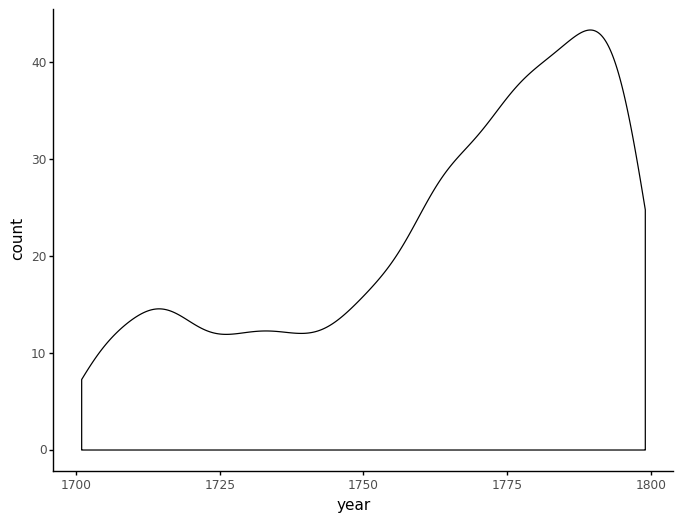

<ggplot: (8765621139925)>

In [10]:
lltk.density(C.metadata, 'year')

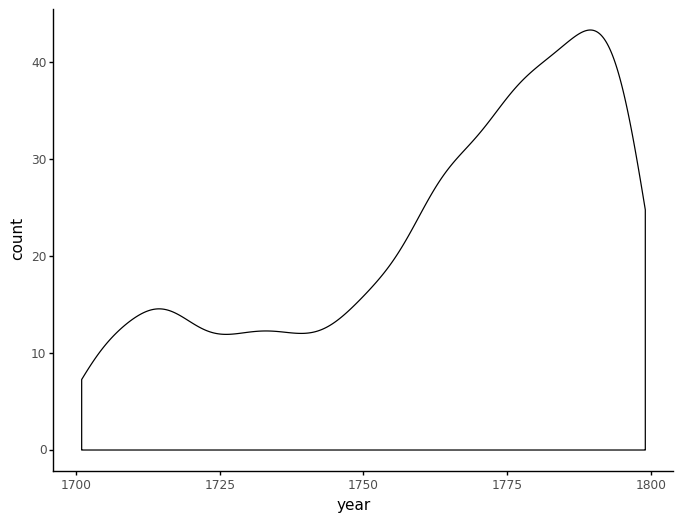

<ggplot: (8765658622737)>

In [11]:
C.metadata_density('year')

In [12]:
# C.metadata.year.plot.hist

### By gender and nationality

In [13]:
C.metadata_barplot('gender')

KeyError: 'gender'

In [ ]:
C.metadata_barplot('nation',vertical=True,figsize=(8,6))

## Install

## Inspect

In [ ]:
# Top 100 words overall, as determined by `n_agg` function over `valtype`
# Then a row for each of these 100 words in each period (`keep_periods` == True) if it's in there 
mfw_df = C.mfw_df(
    n=25000,   # limit to top N words,
    yearbin = 25, # any year delimiter. set to False for no periodizing
    n_by_period=False,    # top N per period or top N overall?
)
mfw_df

In [ ]:
mfw_words = list(mfw_df.word)
len(mfw_words)

In [ ]:
# Use different periods on the fly
C.mfw_df(n=100,keep_periods=True,yearbin=10)

In [ ]:
# Top 100 words overall, as determined by `n_agg` function over `valtype`
# These scores returned (`keep_periods` == False)
C.mfw_df(n=100,keep_periods=False)

In [ ]:
# Get value for a word over time
C.mfw_df(keep_periods=True).query('word == "isabel"')

In [ ]:
# Change yearbin if you want
C.mfw_df(yearbin=100, keep_periods=True).query('word == "isabel"')

In [ ]:
# Get all words and their counts for whole corpus
C.mfw_df(yearbin=False, n=None, keep_periods=True)

In [ ]:
# plot overall top 10 words over the separate periods, where a period is a decade
fig=p9.ggplot(
    p9.aes(x='period',y='fpm',color='word'),
    data=C.mfw_df(n=10, keep_periods=True, excl_stopwords=True, excl_top=100)
)
fig+=p9.geom_point()
fig+=p9.geom_line(p9.aes(group='word'))
fig

### Document-Term Matrix (DTM)

In [ ]:
# Build a document term matrix with the top n words (defaults to 25000)
C.preprocess_dtm(num_proc=4)

In [ ]:
# Load dtm with top n words (defaults to 25000)
C.dtm()

In [ ]:
# !rm -r /home/ryan/lltk_data/corpora/artfl/data

In [ ]:
C.dtm(tf=True)

In [ ]:
dtm_tfidf = C.dtm(tf=True)
dtm_tfidf

In [ ]:
dtm_tfidf.loc['Hemingway,_Ernest.A_Farewell_to_Arms'].sort_values(ascending=False).head(25)